In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib

In [2]:
# 微軟正黑體 reference to https://dev.to/codemee/matplotlib-xian-shi-zhong-wen-4998
matplotlib.rc('font', family='Microsoft JhengHei')

In [3]:
raw_df = pd.read_csv('data.csv')
raw_df.columns

Index(['(Back up)「大眾對社會企業定義的看法」調查 "General public's view on definition of social enterprise" survey  (回應)',
       '1. 您聽過「社會企業」這個詞嗎？ Have you ever heard of the term “social enterprise”?',
       '2. 您能提供一些社會企業的例子嗎？ Could you provide some of the examples of social enterprises?',
       '3. 您認為現時社會企業的宣傳足夠嗎？ Do you think the current publicity of social enterprises is enough?',
       '4. 您認為您對社會企業的定義有充分的了解嗎？ Do you think you comprehend the definition of social enterprise in its entirety?',
       '5. 你有沒有曾經在任何一間社會企業消費？ Have you ever made a purchase in a social enterprise?',
       '6. 您認為在社企消費等於幫助社會嗎？ Do you agree that buying from social enterprises will help society?',
       '7. 你認為社會企業應該把多少比例的企業淨利潤作為股東分紅？ What proportion of corporate net profits do you think social enterprises should pay out as dividends to shareholders?',
       '8. 你認為社會企業應該擁有多少比例的資金來至其商業模式而不是其他基金或資助？ What proportion of capital do you think social enterprises should have come from their business model as opposed to 

In [4]:
rename_map = {
    '(Back up)「大眾對社會企業定義的看法」調查 "General public\'s view on definition of social enterprise" survey  (回應)': 'Timestamp', 
    '1. 您聽過「社會企業」這個詞嗎？ Have you ever heard of the term “social enterprise”?': 'q1', 
    '2. 您能提供一些社會企業的例子嗎？ Could you provide some of the examples of social enterprises?': 'q2', 
    '3. 您認為現時社會企業的宣傳足夠嗎？ Do you think the current publicity of social enterprises is enough?': 'q3', 
    '4. 您認為您對社會企業的定義有充分的了解嗎？ Do you think you comprehend the definition of social enterprise in its entirety?': 'q4', 
    '5. 你有沒有曾經在任何一間社會企業消費？ Have you ever made a purchase in a social enterprise?': 'q5', 
    '6. 您認為在社企消費等於幫助社會嗎？ Do you agree that buying from social enterprises will help society?': 'q6', 
    '7. 你認為社會企業應該把多少比例的企業淨利潤作為股東分紅？ What proportion of corporate net profits do you think social enterprises should pay out as dividends to shareholders?': 'q7', 
    '8. 你認為社會企業應該擁有多少比例的資金來至其商業模式而不是其他基金或資助？ What proportion of capital do you think social enterprises should have come from their business model as opposed to other funds or grants?': 'q8', 
    '9. 你多大程度上同意以下範疇屬於社會使命？ To what extent do you consider the following categories to be social missions? [a. 為有特殊教育需要兒童提供專業訓練 Provide professional training for children with special educational needs]': 'q9a', 
    '9. 你多大程度上同意以下範疇屬於社會使命？ To what extent do you consider the following categories to be social missions? [b. 讓社會弱勢社群共同參與足球活動，創造共融社會 Allow disadvantaged groups in society to participate in football activities and create an inclusive society]': 'q9b', 
    '9. 你多大程度上同意以下範疇屬於社會使命？ To what extent do you consider the following categories to be social missions? [c. 為有需要的人士提供可靠的聽力檢驗結果  Provide reliable hearing test results to those in need]': 'q9c', 
    '9. 你多大程度上同意以下範疇屬於社會使命？ To what extent do you consider the following categories to be social missions? [d. 提供個別關懷，全面照顧和復康運動 Provide individual care, comprehensive care and rehabilitative exercise]': 'q9d', 
    '9. 你多大程度上同意以下範疇屬於社會使命？ To what extent do you consider the following categories to be social missions? [e. 改善長者身體平衡，防止跌倒受傷 Improve the body balance of the elderly and prevent falls and injuries]': 'q9e', 
    '9. 你多大程度上同意以下範疇屬於社會使命？ To what extent do you consider the following categories to be social missions? [f. 推動長者及其家人建立身心靈全人健康狀態 Promote the elderly and their families to establish a healthy state of body, mind and spirit]': 'q9f', 
    '9. 你多大程度上同意以下範疇屬於社會使命？ To what extent do you consider the following categories to be social missions? [g. 促進正面發展並灌輸正確價值觀給幼稚園到大學的學生 Promote positive development and instill the right values ​​in students from kindergarten to university]': 'q9g', 
    '9. 你多大程度上同意以下範疇屬於社會使命？ To what extent do you consider the following categories to be social missions? [h. 向富有才華的青年人提供表演平台 Provide performance platform to talented young people]': 'q9h', 
    '9. 你多大程度上同意以下範疇屬於社會使命？ To what extent do you consider the following categories to be social missions? [i. 以中式酒樓業務為弱勢婦女的提供工作及培訓機會 Providing job and training opportunities for disadvantaged women through Chinese restaurant business]': 'q9i', 
    '9. 你多大程度上同意以下範疇屬於社會使命？ To what extent do you consider the following categories to be social missions? [j. 支持本地生產及生態種植 Support local production and ecological planting]': 'q9j', 
    '9. 你多大程度上同意以下範疇屬於社會使命？ To what extent do you consider the following categories to be social missions? [k. 推廣素食文化，建立健康社區 Promote vegetarian culture and build healthy communities]': 'q9k', 
    '9. 你多大程度上同意以下範疇屬於社會使命？ To what extent do you consider the following categories to be social missions? [l. 利用健身室或提供瑜伽班推廣全民健康 Use fitness studios or provide yoga classes to promote universal health]': 'q9l', 
    '10. 您認為在香港創辦社會企業必須符合下列哪一項要求？ Which of the following requirement(s) do you think have to fulfill for starting a social enterprise in Hong Kong?': 'q10', 
    '11. 您認為在香港開設社會企業需要有關牌照或者認證嗎？ Do you think licensing or a certificate is required to start a social enterprise in Hong Kong?': 'q11', 
    '12. 據你所知，現時有沒有特定法例規管社會企業嗎？ Do you think there is any specific legislations currently regulating social enterprises?': 'q12', 
    '13. 您認為誰可以在香港創辦社會企業？(可選擇多項） Who(s) can launch a social enterprise in Hong Kong?': 'q13', 
    '您的年齡 Your age group': 'Agegroup', 
    '您的教育水平  Your education level': 'Education', 
    '您的收入水平(每月) Your income level (Per month)': 'Income', 
    '你是從哪裡得知此問卷？ Where did you receive this questionnaire?': 'Receive', 
    '推薦人名稱 Recommender name': 'Recommender'
}

In [5]:
reverse_rename_map = {value: key for key, value in rename_map.items()}

In [6]:
# reverse_rename_map = {
#     'Timestamp': '(Back up)「大眾對社會企業定義的看法」調查 "General public\'s view on definition of social enterprise" survey  (回應)', 
#     'q1': '1. 您聽過「社會企業」這個詞嗎？ Have you ever heard of the term “social enterprise”?', 
#     'q2': '2. 您能提供一些社會企業的例子嗎？ Could you provide some of the examples of social enterprises?', 
#     'q3': '3. 您認為現時社會企業的宣傳足夠嗎？ Do you think the current publicity of social enterprises is enough?', 
#     'q4': '4. 您認為您對社會企業的定義有充分的了解嗎？ Do you think you comprehend the definition of social enterprise in its entirety?', 
#     'q5': '5. 你有沒有曾經在任何一間社會企業消費？ Have you ever made a purchase in a social enterprise?', 
#     'q6': '6. 您認為在社企消費等於幫助社會嗎？ Do you agree that buying from social enterprises will help society?', 
#     'q7': '7. 你認為社會企業應該把多少比例的企業淨利潤作為股東分紅？ What proportion of corporate net profits do you think social enterprises should pay out as dividends to shareholders?', 
#     'q8': '8. 你認為社會企業應該擁有多少比例的資金來至其商業模式而不是其他基金或資助？ What proportion of capital do you think social enterprises should have come from their business model as opposed to other funds or grants?', 
#     'q9a': '9. 你多大程度上同意以下範疇屬於社會使命？ To what extent do you consider the following categories to be social missions? [a. 為有特殊教育需要兒童提供專業訓練 Provide professional training for children with special educational needs]', 
#     'q9b': '9. 你多大程度上同意以下範疇屬於社會使命？ To what extent do you consider the following categories to be social missions? [b. 讓社會弱勢社群共同參與足球活動，創造共融社會 Allow disadvantaged groups in society to participate in football activities and create an inclusive society]', 
#     'q9c': '9. 你多大程度上同意以下範疇屬於社會使命？ To what extent do you consider the following categories to be social missions? [c. 為有需要的人士提供可靠的聽力檢驗結果  Provide reliable hearing test results to those in need]', 
#     'q9d': '9. 你多大程度上同意以下範疇屬於社會使命？ To what extent do you consider the following categories to be social missions? [d. 提供個別關懷，全面照顧和復康運動 Provide individual care, comprehensive care and rehabilitative exercise]', 
#     'q9e': '9. 你多大程度上同意以下範疇屬於社會使命？ To what extent do you consider the following categories to be social missions? [e. 改善長者身體平衡，防止跌倒受傷 Improve the body balance of the elderly and prevent falls and injuries]', 
#     'q9f': '9. 你多大程度上同意以下範疇屬於社會使命？ To what extent do you consider the following categories to be social missions? [f. 推動長者及其家人建立身心靈全人健康狀態 Promote the elderly and their families to establish a healthy state of body, mind and spirit]', 
#     'q9g': '9. 你多大程度上同意以下範疇屬於社會使命？ To what extent do you consider the following categories to be social missions? [g. 促進正面發展並灌輸正確價值觀給幼稚園到大學的學生 Promote positive development and instill the right values ​​in students from kindergarten to university]', 
#     'q9h': '9. 你多大程度上同意以下範疇屬於社會使命？ To what extent do you consider the following categories to be social missions? [h. 向富有才華的青年人提供表演平台 Provide performance platform to talented young people]', 
#     'q9i': '9. 你多大程度上同意以下範疇屬於社會使命？ To what extent do you consider the following categories to be social missions? [i. 以中式酒樓業務為弱勢婦女的提供工作及培訓機會 Providing job and training opportunities for disadvantaged women through Chinese restaurant business]', 
#     'q9j': '9. 你多大程度上同意以下範疇屬於社會使命？ To what extent do you consider the following categories to be social missions? [j. 支持本地生產及生態種植 Support local production and ecological planting]', 
#     'q9k': '9. 你多大程度上同意以下範疇屬於社會使命？ To what extent do you consider the following categories to be social missions? [k. 推廣素食文化，建立健康社區 Promote vegetarian culture and build healthy communities]', 
#     'q9l': '9. 你多大程度上同意以下範疇屬於社會使命？ To what extent do you consider the following categories to be social missions? [l. 利用健身室或提供瑜伽班推廣全民健康 Use fitness studios or provide yoga classes to promote universal health]', 
#     'q10': '10. 您認為在香港創辦社會企業必須符合下列哪一項要求？ Which of the following requirement(s) do you think have to fulfill for starting a social enterprise in Hong Kong?', 
#     'q11': '11. 您認為在香港開設社會企業需要有關牌照或者認證嗎？ Do you think licensing or a certificate is required to start a social enterprise in Hong Kong?', 
#     'q12': '12. 據你所知，現時有沒有特定法例規管社會企業嗎？ Do you think there is any specific legislations currently regulating social enterprises?', 
#     'q13': '13. 您認為誰可以在香港創辦社會企業？(可選擇多項） Who(s) can launch a social enterprise in Hong Kong?', 
#     'Agegroup': '您的年齡 Your age group', 
#     'Education': '您的教育水平  Your education level', 
#     'Income': '您的收入水平(每月) Your income level (Per month)', 
#     'Receive': '你是從哪裡得知此問卷？ Where did you receive this questionnaire?', 
#     'Recommender': '推薦人名稱 Recommender name'
# }

In [7]:
map_registry = {
    'map_col_rename': {
        '(Back up)「大眾對社會企業定義的看法」調查 "General public\'s view on definition of social enterprise" survey  (回應)': 'Timestamp', 
        '1. 您聽過「社會企業」這個詞嗎？ Have you ever heard of the term “social enterprise”?': 'q1', 
        '2. 您能提供一些社會企業的例子嗎？ Could you provide some of the examples of social enterprises?': 'q2', 
        '3. 您認為現時社會企業的宣傳足夠嗎？ Do you think the current publicity of social enterprises is enough?': 'q3', 
        '4. 您認為您對社會企業的定義有充分的了解嗎？ Do you think you comprehend the definition of social enterprise in its entirety?': 'q4', 
        '5. 你有沒有曾經在任何一間社會企業消費？ Have you ever made a purchase in a social enterprise?': 'q5', 
        '6. 您認為在社企消費等於幫助社會嗎？ Do you agree that buying from social enterprises will help society?': 'q6', 
        '7. 你認為社會企業應該把多少比例的企業淨利潤作為股東分紅？ What proportion of corporate net profits do you think social enterprises should pay out as dividends to shareholders?': 'q7', 
        '8. 你認為社會企業應該擁有多少比例的資金來至其商業模式而不是其他基金或資助？ What proportion of capital do you think social enterprises should have come from their business model as opposed to other funds or grants?': 'q8', 
        '9. 你多大程度上同意以下範疇屬於社會使命？ To what extent do you consider the following categories to be social missions? [a. 為有特殊教育需要兒童提供專業訓練 Provide professional training for children with special educational needs]': 'q9a', 
        '9. 你多大程度上同意以下範疇屬於社會使命？ To what extent do you consider the following categories to be social missions? [b. 讓社會弱勢社群共同參與足球活動，創造共融社會 Allow disadvantaged groups in society to participate in football activities and create an inclusive society]': 'q9b', 
        '9. 你多大程度上同意以下範疇屬於社會使命？ To what extent do you consider the following categories to be social missions? [c. 為有需要的人士提供可靠的聽力檢驗結果  Provide reliable hearing test results to those in need]': 'q9c', 
        '9. 你多大程度上同意以下範疇屬於社會使命？ To what extent do you consider the following categories to be social missions? [d. 提供個別關懷，全面照顧和復康運動 Provide individual care, comprehensive care and rehabilitative exercise]': 'q9d', 
        '9. 你多大程度上同意以下範疇屬於社會使命？ To what extent do you consider the following categories to be social missions? [e. 改善長者身體平衡，防止跌倒受傷 Improve the body balance of the elderly and prevent falls and injuries]': 'q9e', 
        '9. 你多大程度上同意以下範疇屬於社會使命？ To what extent do you consider the following categories to be social missions? [f. 推動長者及其家人建立身心靈全人健康狀態 Promote the elderly and their families to establish a healthy state of body, mind and spirit]': 'q9f', 
        '9. 你多大程度上同意以下範疇屬於社會使命？ To what extent do you consider the following categories to be social missions? [g. 促進正面發展並灌輸正確價值觀給幼稚園到大學的學生 Promote positive development and instill the right values ​​in students from kindergarten to university]': 'q9g', 
        '9. 你多大程度上同意以下範疇屬於社會使命？ To what extent do you consider the following categories to be social missions? [h. 向富有才華的青年人提供表演平台 Provide performance platform to talented young people]': 'q9h', 
        '9. 你多大程度上同意以下範疇屬於社會使命？ To what extent do you consider the following categories to be social missions? [i. 以中式酒樓業務為弱勢婦女的提供工作及培訓機會 Providing job and training opportunities for disadvantaged women through Chinese restaurant business]': 'q9i', 
        '9. 你多大程度上同意以下範疇屬於社會使命？ To what extent do you consider the following categories to be social missions? [j. 支持本地生產及生態種植 Support local production and ecological planting]': 'q9j', 
        '9. 你多大程度上同意以下範疇屬於社會使命？ To what extent do you consider the following categories to be social missions? [k. 推廣素食文化，建立健康社區 Promote vegetarian culture and build healthy communities]': 'q9k', 
        '9. 你多大程度上同意以下範疇屬於社會使命？ To what extent do you consider the following categories to be social missions? [l. 利用健身室或提供瑜伽班推廣全民健康 Use fitness studios or provide yoga classes to promote universal health]': 'q9l', 
        '10. 您認為在香港創辦社會企業必須符合下列哪一項要求？ Which of the following requirement(s) do you think have to fulfill for starting a social enterprise in Hong Kong?': 'q10', 
        '11. 您認為在香港開設社會企業需要有關牌照或者認證嗎？ Do you think licensing or a certificate is required to start a social enterprise in Hong Kong?': 'q11', 
        '12. 據你所知，現時有沒有特定法例規管社會企業嗎？ Do you think there is any specific legislations currently regulating social enterprises?': 'q12', 
        '13. 您認為誰可以在香港創辦社會企業？(可選擇多項） Who(s) can launch a social enterprise in Hong Kong?': 'q13', 
        '您的年齡 Your age group': 'Agegroup', 
        '您的教育水平  Your education level': 'Education', 
        '您的收入水平(每月) Your income level (Per month)': 'Income', 
        '你是從哪裡得知此問卷？ Where did you receive this questionnaire?': 'Receive', 
        '推薦人名稱 Recommender name': 'Recommender'
        },
    'map_yes_no': {
        '是 Yes': 1,
        '否 No': 0
        },
    'map_q7': {
        '0': 0,
        '⅓': 0.333,
        '½': 0.5,
        '⅔': 0.667,
        '¾': 0.75,
        '全部 All': 1
        },
    'map_q8': {
        '0% - 19%': 0,
        '20% - 49%': 0,
        '50% - 79%': 1,
        '80% - 100%': 1
        },
    'map_q9': {
        '非常同意 Strongly agree': 2,
        '同意 Agree': 1,
        '不同意 Disagree': -1,
        '非常不同意 Strongly disagree': -2
        },
    'map_q10': {
        '肩負社會使命 Having a social mission': 'q10_mission',
        '一定比例的企業淨利（例如至少 ⅔ ）必須投放經營社企上 A certain ratio (e.g. at least ⅔) of the net profit has to be reinvested in the social enterprises’ operation)': 'q10_reinvest',
        '獲得政府或社會企業組織的認證（例如 香港社會服務聯會社企指南 SEBC、香港社會企業總會社企認證 SEEMARK）Recognized by the Government or Social Enterprise organization (e.g. SE Directory of HKCSS; SEE MARK of GCSE)': 'q10_recognized',
        '必須實踐及履行 ESG（環境、社會和治理）/CSR（企業社會責任）': 'q10_esg_csr',
        '透過提供服務或產品銷售創造收入，自負盈虧 Generate income by providing services or selling products and  be financially self-sustainable': 'q10_self_sustain',
        '稅務局確認的慈善組織（俗稱88牌） A charitable organization recognized by the Inland Revenue under Section 88.其他: 請註明( others: please specify )': 'q10_irs_88',
        '受政府或企業資助 Subsidized by the Government or private enterprise': 'q10_subsidized',
        '非政府組織 Non-Government Organization (NGO)': 'q10_ngo'
        },
    'map_q13': {
        '任何人 Anyone': 'q13_anyone',
        '企業 Enterprises': 'q13_enterprises',
        '慈善機構 Charity': 'q13_charity',
        '政府 The Government': 'q13_government',
        '非政府組織/非牟利組織 NGOs/NPOs': 'q13_NGOs_NPOs'
        },
    'map_Agegroup': {
        '18-25 歳 18-25 years old': 1,
        '26-35 歳 26-35 years old': 2,
        '36-50 歳 36-50 years old': 3,
        '51-64 歳 51-64 years old': 4,
        '65 歳以上 over 65': 5
        },
    'map_Education': {
        '其他 others:': 0,
        '小學畢業或以下 Graduating from primary school or below': 1,
        '中學畢業 Graduating from secondary school': 2,
        '專上教育 (非學位／副學位課程) Higher education (Non-degree/Sub-degree programmes)': 3,
        '專上教育 (學士學位課程) Higher education (Degree programmes)': 4,
        '專上教育 (碩士／博士學位課程) Higher education (Master/ Doctor programmes)': 5
        },
    'map_Income': {
        '$20000 以下 Below $20000': 10000,
        '$20000 - $39999': 30000,
        '$40000 - $59999': 50000,
        '$60000 - $79999': 70000,
        '$80000 以上 More than $80000': 90000
        },
    'map_cols': {
        'cols_one_hot_encode_map': [ 'q10', 'q13'],
        'cols_simple_map': {
            'cols_single': ['q7', 'q8', 'Agegroup', 'Education', 'Income'],
            'cols_yes_no': ['q1', 'q3', 'q4', 'q5', 'q6', 'q11', 'q12'],
            'cols_q9': ['q9a', 'q9b', 'q9c', 'q9d', 'q9e', 'q9f', 'q9g', 'q9h', 'q9i', 'q9j', 'q9k', 'q9l']
            }
        }
    }

In [8]:
def reverse_map(map_dict):
    return {v: k for k, v in map_dict.items()}

def convert_chinese_timestamp(series):
    """
    Convert a series of Chinese timestamps to datetime objects.
    """
    # Replace Chinese AM/PM with English equivalents
    converted = series.str.replace('上午', 'AM').str.replace('下午', 'PM')
    
    # Convert to datetime with the correct format
    return pd.to_datetime(converted, format='%Y年%m月%d日 %p%I:%M:%S', errors='coerce')

def simple_map(df, col_name, map_dict):
    """
    Map the values in a column using a provided mapping dictionary.
    """
    df = df.copy()
    # Map the column using the mapping dictionary
    df[col_name] = df[col_name].map(lambda x: map_dict.get(x, np.nan))
    
    return df

def one_hot_encode_map(df, col_name, map_dict):
    """
    One-hot encode a column in the DataFrame.
    The column is expected to contain comma-separated values.
    """
    df = df.copy()
    # Get the position of the column to be one-hot encoded
    col_index = df.columns.get_loc(col_name)

    # One-hot encode the column and rename the columns using the mapping dictionary
    dummies = df[col_name].str.get_dummies(sep=', ').rename(columns=map_dict)

    # preseve column order same as key order in the mapping dictionary
    dummies = dummies.reindex(columns=map_dict.values())
    
    # replace the original column with the one-hot encoded columns at the original position of the column
    df = pd.concat([df.iloc[:, :col_index], dummies, df.iloc[:, col_index + 1:]], axis=1)
    
    return df

def data_cleaning(df):
    """
    Clean the DataFrame by renaming columns, converting timestamps, and mapping values.
    """
    # create a copy of the DataFrame to avoid modifying the original
    df = df.copy()
    # rename columns
    df = df.rename(columns=map_registry['map_col_rename'])
    df.columns = ['timestamp'] + list(df.columns[1:])
    # convert timestamp to datetime
    df['timestamp'] = convert_chinese_timestamp(df['timestamp'])

    # q16 is income in string format, convert to numeric
    df['Income'] = df['Income'].str.replace('$60000 - $80000', '$60000 - $79999')

    # q10 contain "," inside the answer, convert to ";" first
    df['q10'] = df['q10'].str.replace('HKCSS, SEE', 'HKCSS; SEE')

    # loop through the map_cols in map_registry to apply mapping
    for map_type, map_candidate in map_registry['map_cols'].items():
        if map_type == 'cols_one_hot_encode_map':
            for col in map_candidate:
                map_name = f'map_{col}'
                df = one_hot_encode_map(df, col, map_registry[map_name])
                
        elif map_type == 'cols_simple_map':
            for sub_map_type, sub_map_candidate in map_candidate.items():
                if sub_map_type == 'cols_single':
                    for col in sub_map_candidate:
                        map_name = f'map_{col}'
                        df = simple_map(df, col, map_registry[map_name])
                else:
                    for col in sub_map_candidate:
                        map_name = f"map_{sub_map_type.split('cols_')[1]}"
                        df = simple_map(df, col, map_registry[map_name])
        else:
            print(f"unknown key: {map_type}")

    return df

In [9]:
df = data_cleaning(raw_df)

### Regardless of "correct" or "incorrect", younger participants tend to select fewer options in Q10

In [10]:
q10_age = df[['Agegroup'] + list(map_registry['map_q10'].values())].copy()
q10_age['q10_all'] = 1
pd.options.display.float_format = '{:,.1%}'.format
display(simple_map(q10_age, 'Agegroup', reverse_map(map_registry['map_Agegroup'])).groupby('Agegroup').mean())
display(simple_map(q10_age, 'Agegroup', reverse_map(map_registry['map_Agegroup'])).groupby('Agegroup').sum())

,q10_mission,q10_reinvest,q10_recognized,q10_esg_csr,q10_self_sustain,q10_irs_88,q10_subsidized,q10_ngo,q10_all
Agegroup,,,,,,,,,
18-25 歳 18-25 years old,84.7%,57.1%,52.7%,55.7%,44.3%,36.9%,35.0%,29.1%,100.0%
26-35 歳 26-35 years old,89.2%,65.7%,56.9%,59.8%,56.9%,44.1%,29.4%,28.4%,100.0%
36-50 歳 36-50 years old,85.1%,68.3%,59.6%,55.9%,51.6%,46.6%,41.0%,41.0%,100.0%
51-64 歳 51-64 years old,89.5%,75.4%,71.9%,64.0%,60.5%,59.6%,55.3%,59.6%,100.0%
65 歳以上 over 65,71.4%,57.1%,64.3%,64.3%,64.3%,42.9%,50.0%,50.0%,100.0%


,q10_mission,q10_reinvest,q10_recognized,q10_esg_csr,q10_self_sustain,q10_irs_88,q10_subsidized,q10_ngo,q10_all
Agegroup,,,,,,,,,
18-25 歳 18-25 years old,172,116,107,113,90,75,71,59,203
26-35 歳 26-35 years old,91,67,58,61,58,45,30,29,102
36-50 歳 36-50 years old,137,110,96,90,83,75,66,66,161
51-64 歳 51-64 years old,102,86,82,73,69,68,63,68,114
65 歳以上 over 65,10,8,9,9,9,6,7,7,14


In [11]:
# plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [12]:
def count_values(df):
    counts = pd.DataFrame()
    for col in df.columns:
        counts[col] = df[col].astype(
            pd.CategoricalDtype(
                categories=["非常不同意 Strongly disagree", "不同意 Disagree", "同意 Agree", "非常同意 Strongly agree"], 
                ordered=True
            )
        ).value_counts(normalize=True).sort_index()
    return counts

In [13]:
q9_cols = map_registry['map_cols']['cols_simple_map']['cols_q9']
q9 = simple_map(df[q9_cols], q9_cols, reverse_map(map_registry['map_q9']))

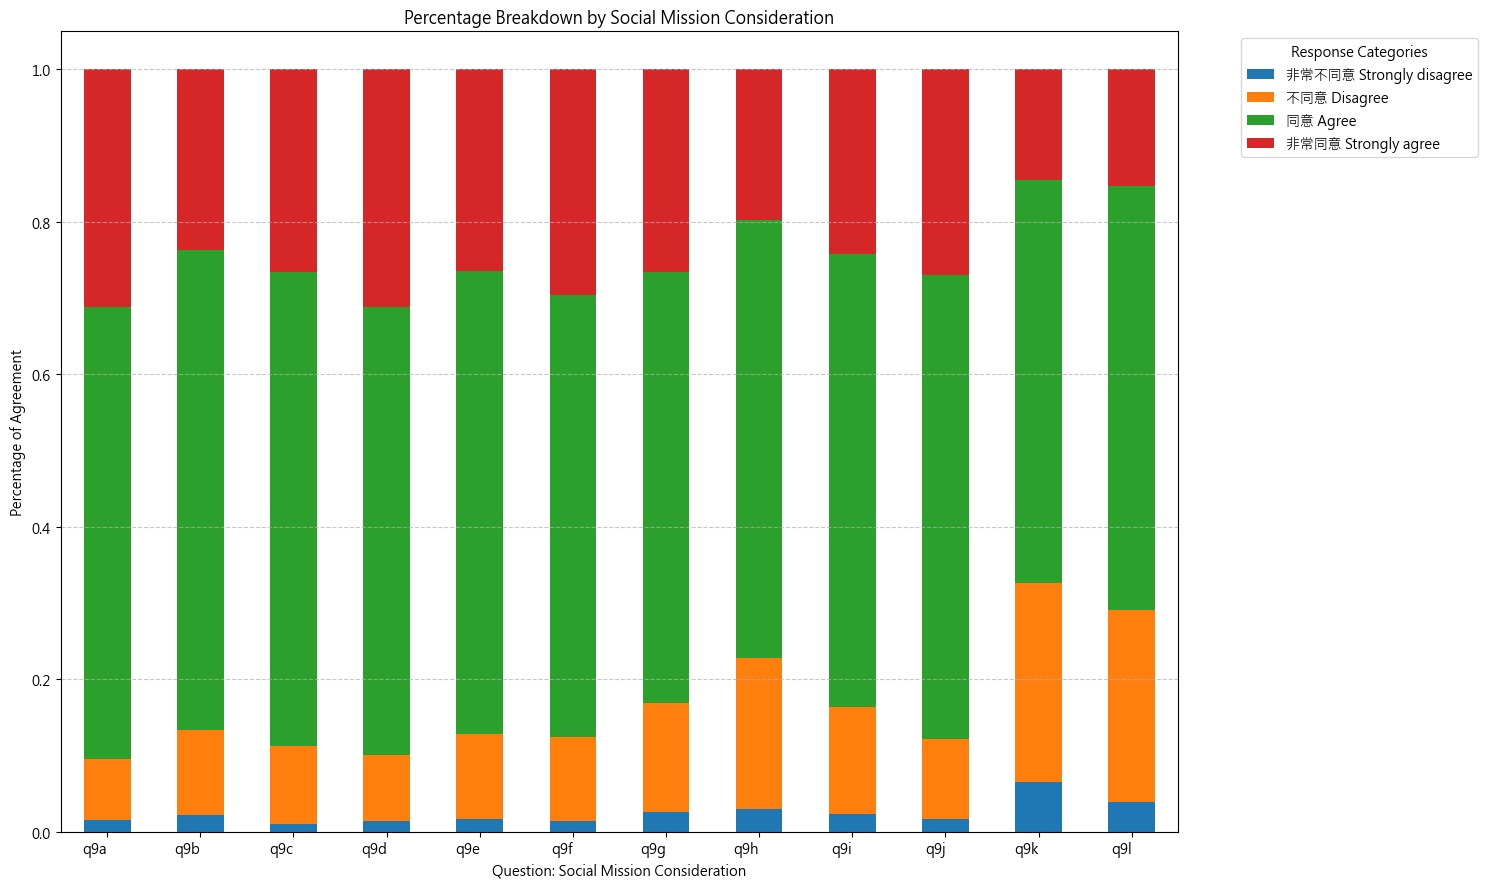

In [14]:
count_values(q9).T.plot(kind='bar', stacked=True, figsize=(15, 9))
plt.title('Percentage Breakdown by Social Mission Consideration')
plt.xlabel('Question: Social Mission Consideration')
plt.ylabel('Percentage of Agreement')
plt.xticks(rotation ='horizontal', ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Response Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('stacked_bar_chart.png')

In [15]:
def cross_tab_bar_chart(df, x_column, y_column, normalize):
    crosstab = pd.crosstab(index=df[x_column], columns=df[y_column], normalize=normalize)
    crosstab.T.plot(kind='bar', stacked=True, figsize=(15, 9))
    plt.xticks(rotation ='horizontal')

    plt.title(reverse_rename_map[x_column])
    plt.xlabel(reverse_rename_map[y_column])
    plt.ylabel('Percentage of Agreement (%)')
    plt.legend(title='Yes = 1, No = 0', bbox_to_anchor=(1.05, 1), loc='upper left')

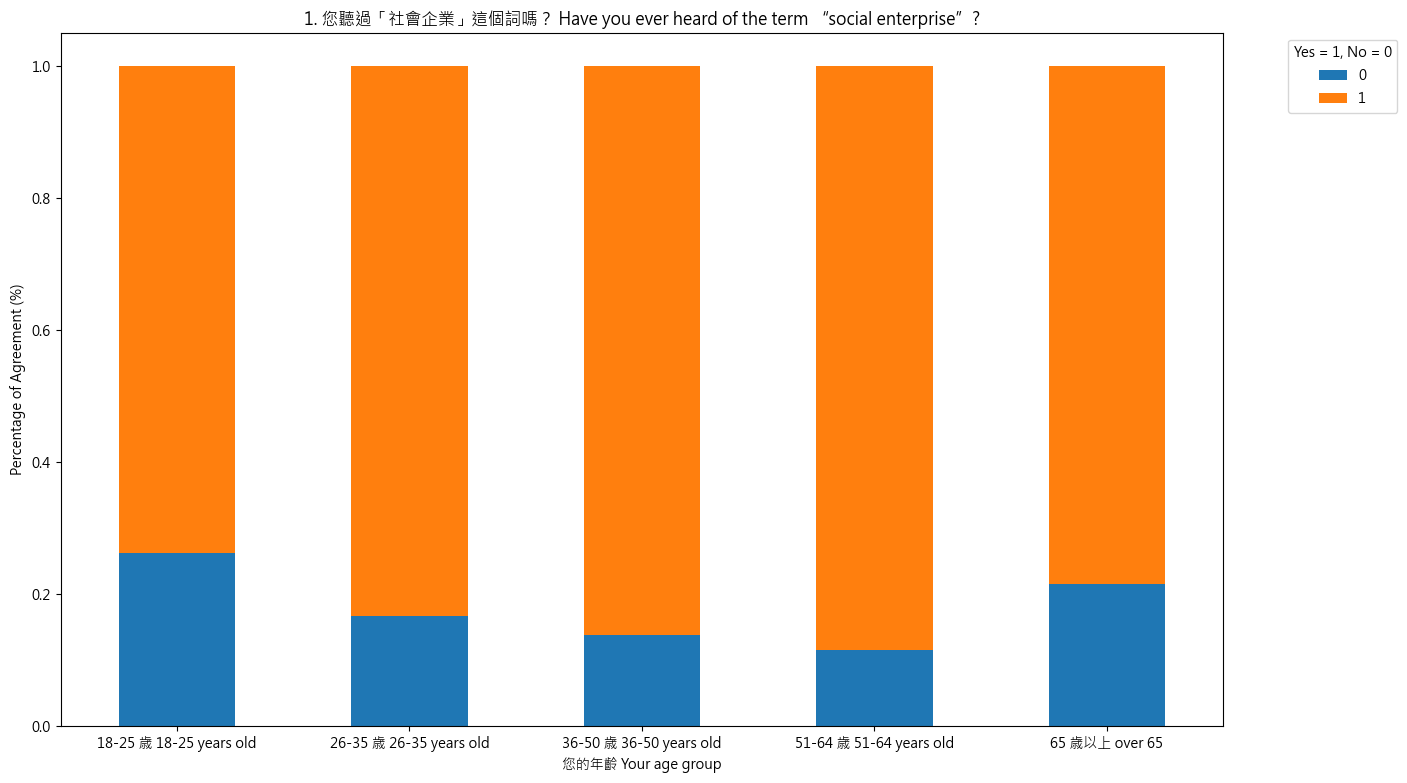

In [16]:
cross_tab_bar_chart(simple_map(df, ['Agegroup'], reverse_map(map_registry['map_Agegroup'])), 'q1', 'Agegroup', 'columns')

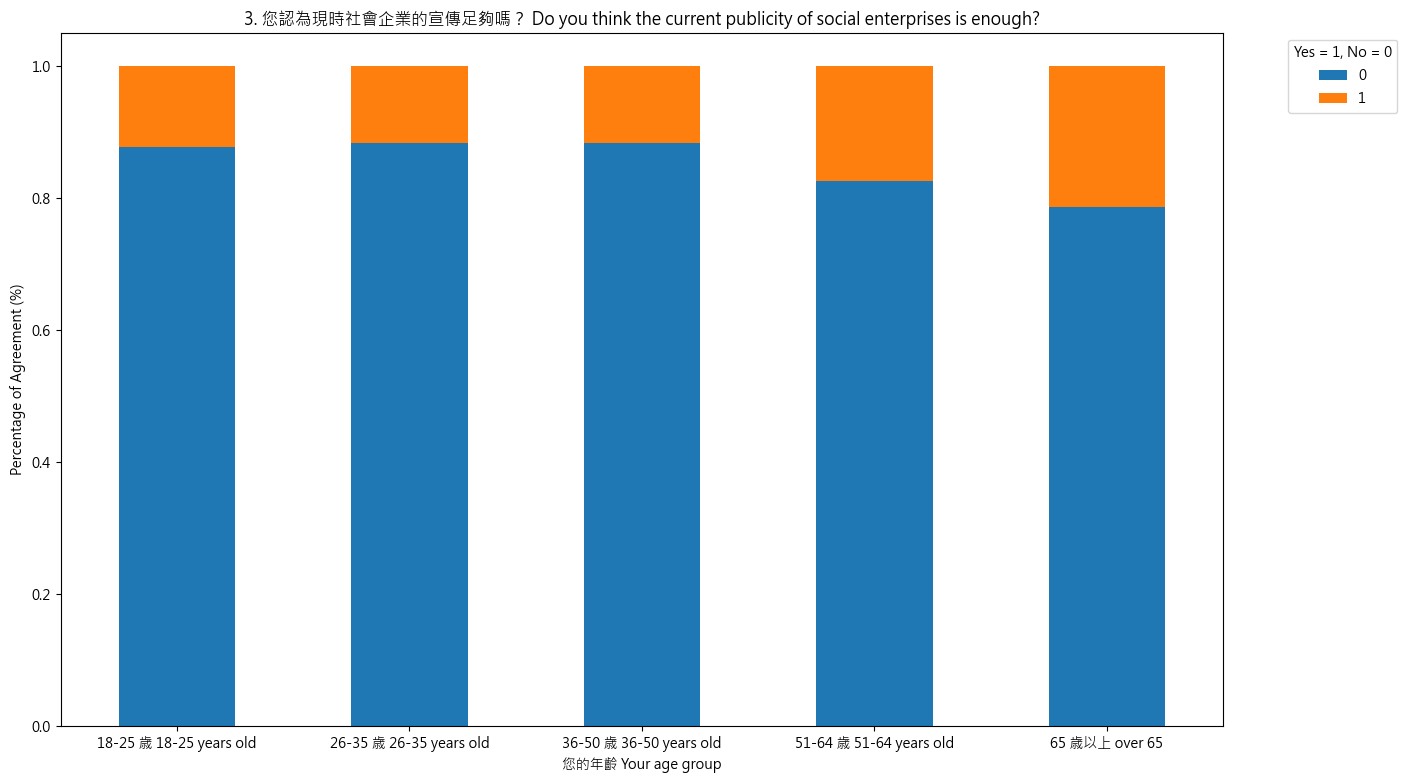

In [17]:
cross_tab_bar_chart(simple_map(df, ['Agegroup'], reverse_map(map_registry['map_Agegroup'])), 'q3', 'Agegroup', 'columns')

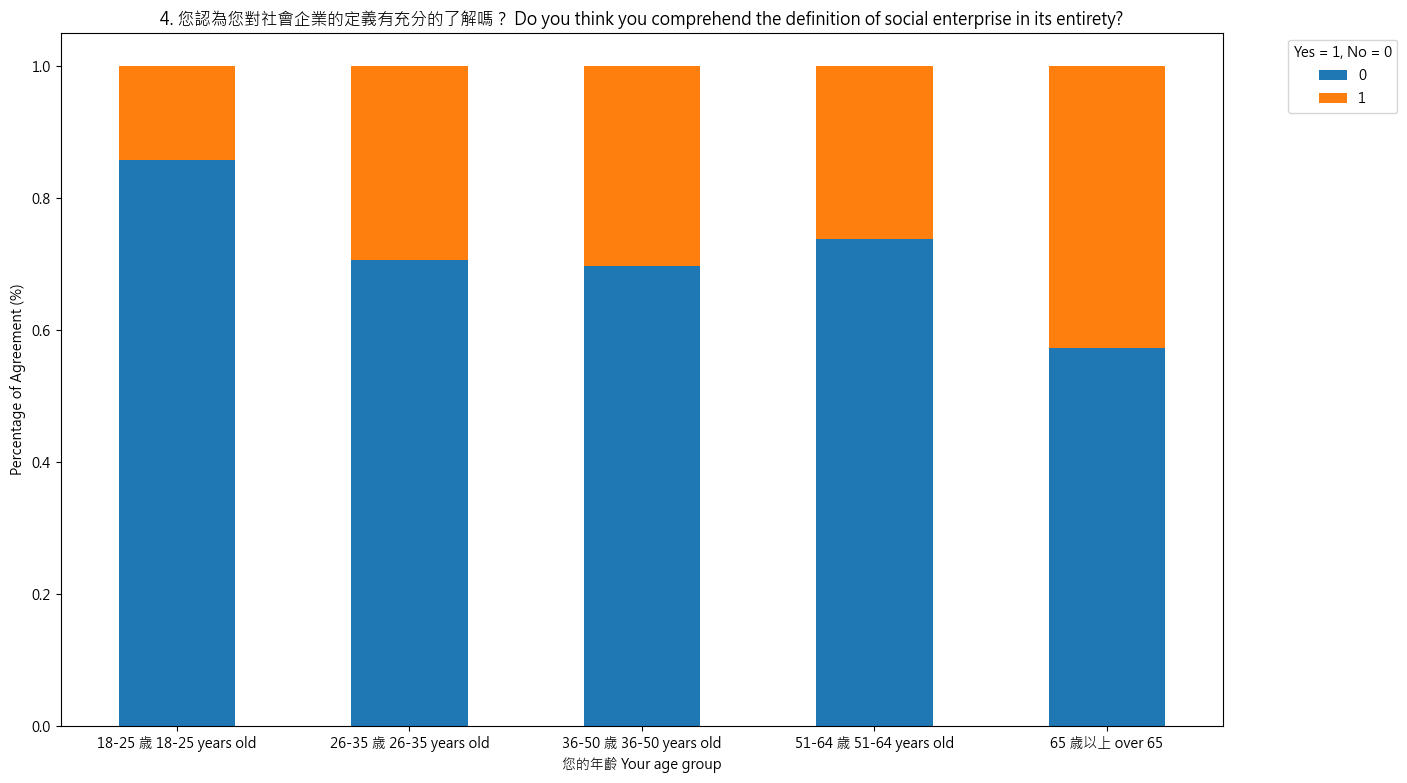

In [18]:
cross_tab_bar_chart(simple_map(df, ['Agegroup'], reverse_map(map_registry['map_Agegroup'])), 'q4', 'Agegroup', 'columns')

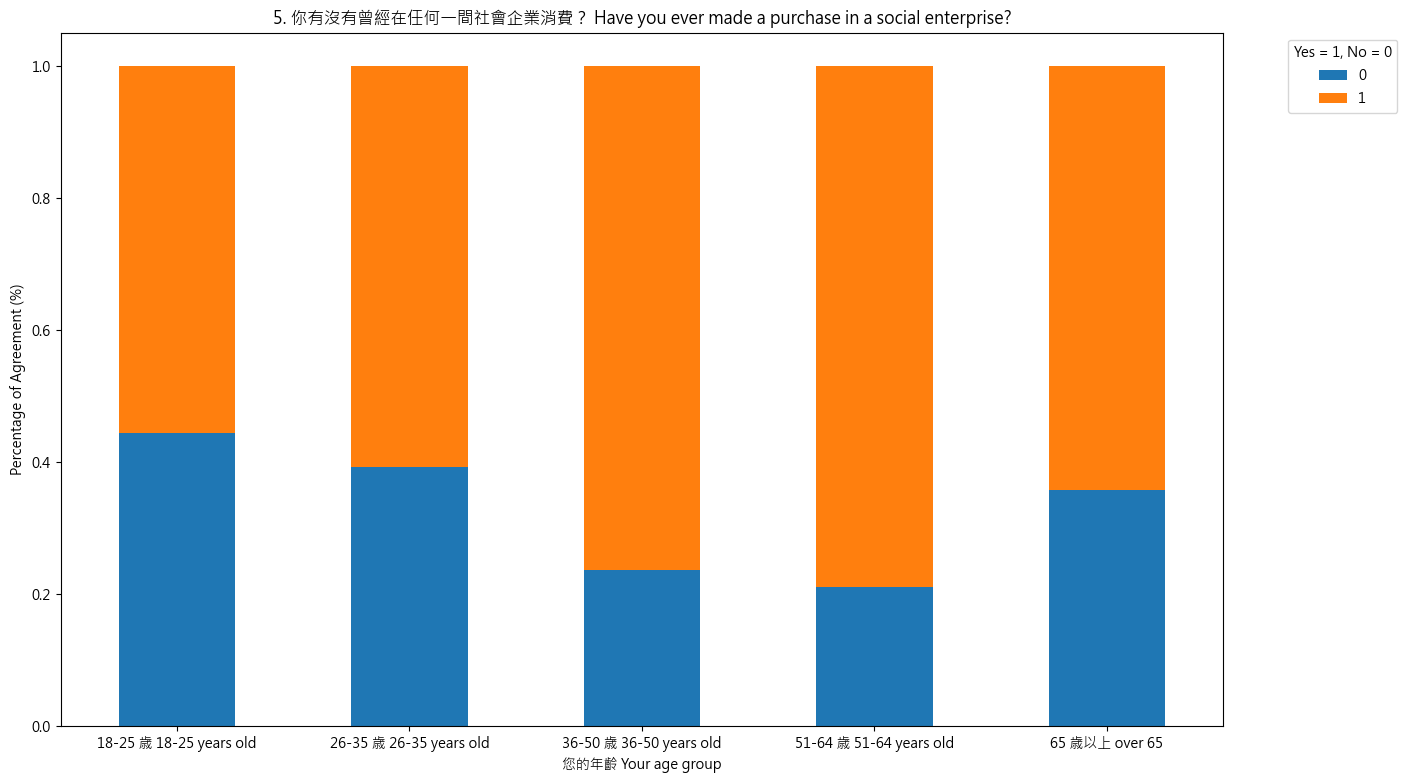

In [19]:
cross_tab_bar_chart(simple_map(df, ['Agegroup'], reverse_map(map_registry['map_Agegroup'])), 'q5', 'Agegroup', 'columns')

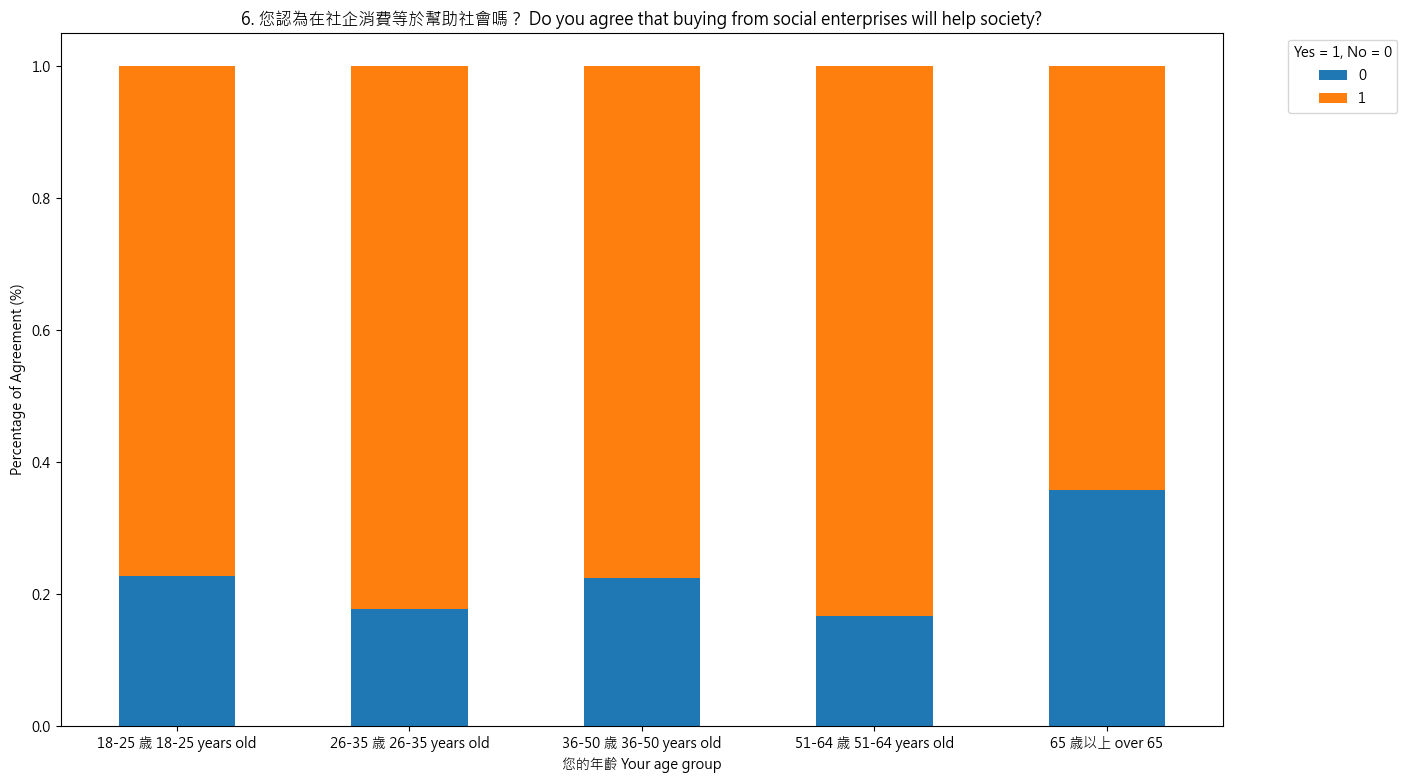

In [20]:
cross_tab_bar_chart(simple_map(df, ['Agegroup'], reverse_map(map_registry['map_Agegroup'])), 'q6', 'Agegroup', 'columns')

<Axes: title={'center': 'Correlation Heatmap of Survey Data'}>

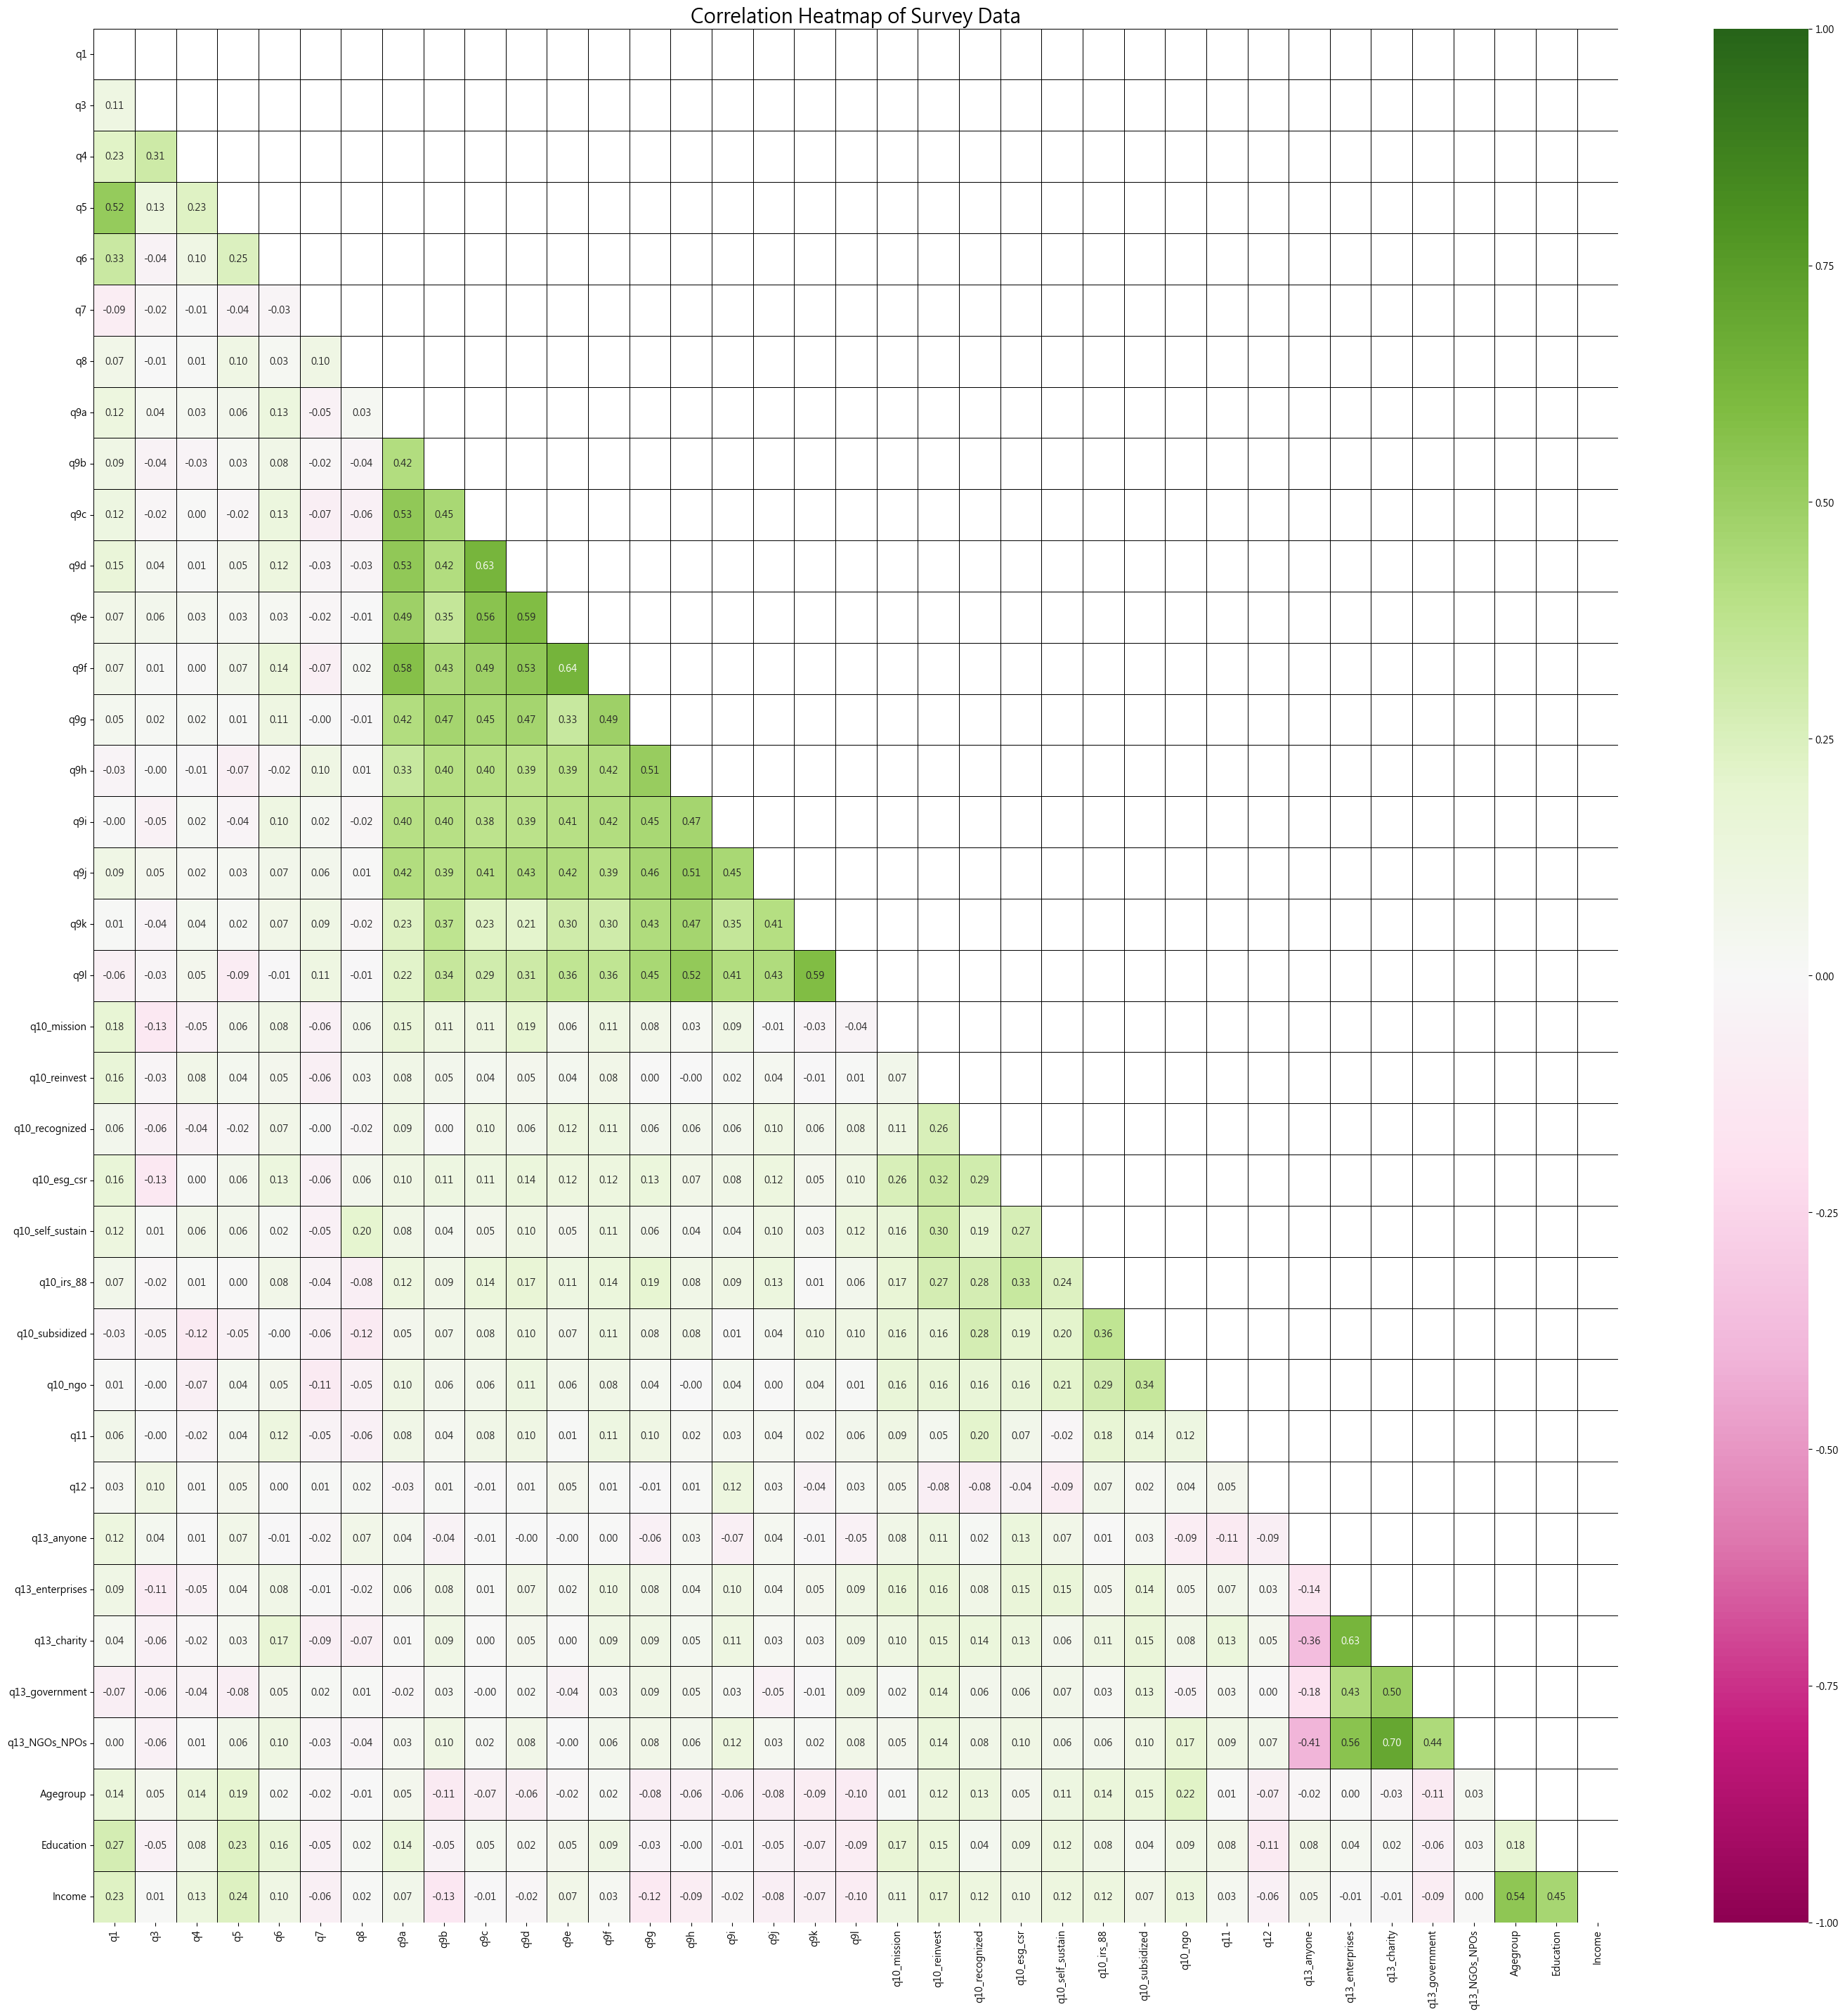

In [21]:
fig, ax = plt.subplots(figsize=(35, 35))
# Set the title of the plot
ax.set_title('Correlation Heatmap of Survey Data', fontsize=20)
corr = df.drop(columns=['timestamp', 'q2', 'Receive', 'Recommender']).corr()
matrix = np.triu(corr)
sns.heatmap(corr, vmin=-1, vmax=1, cmap="PiYG", center=0, annot=True, fmt=".2f", linewidth=0.5, linecolor='black', mask=matrix, ax=ax)

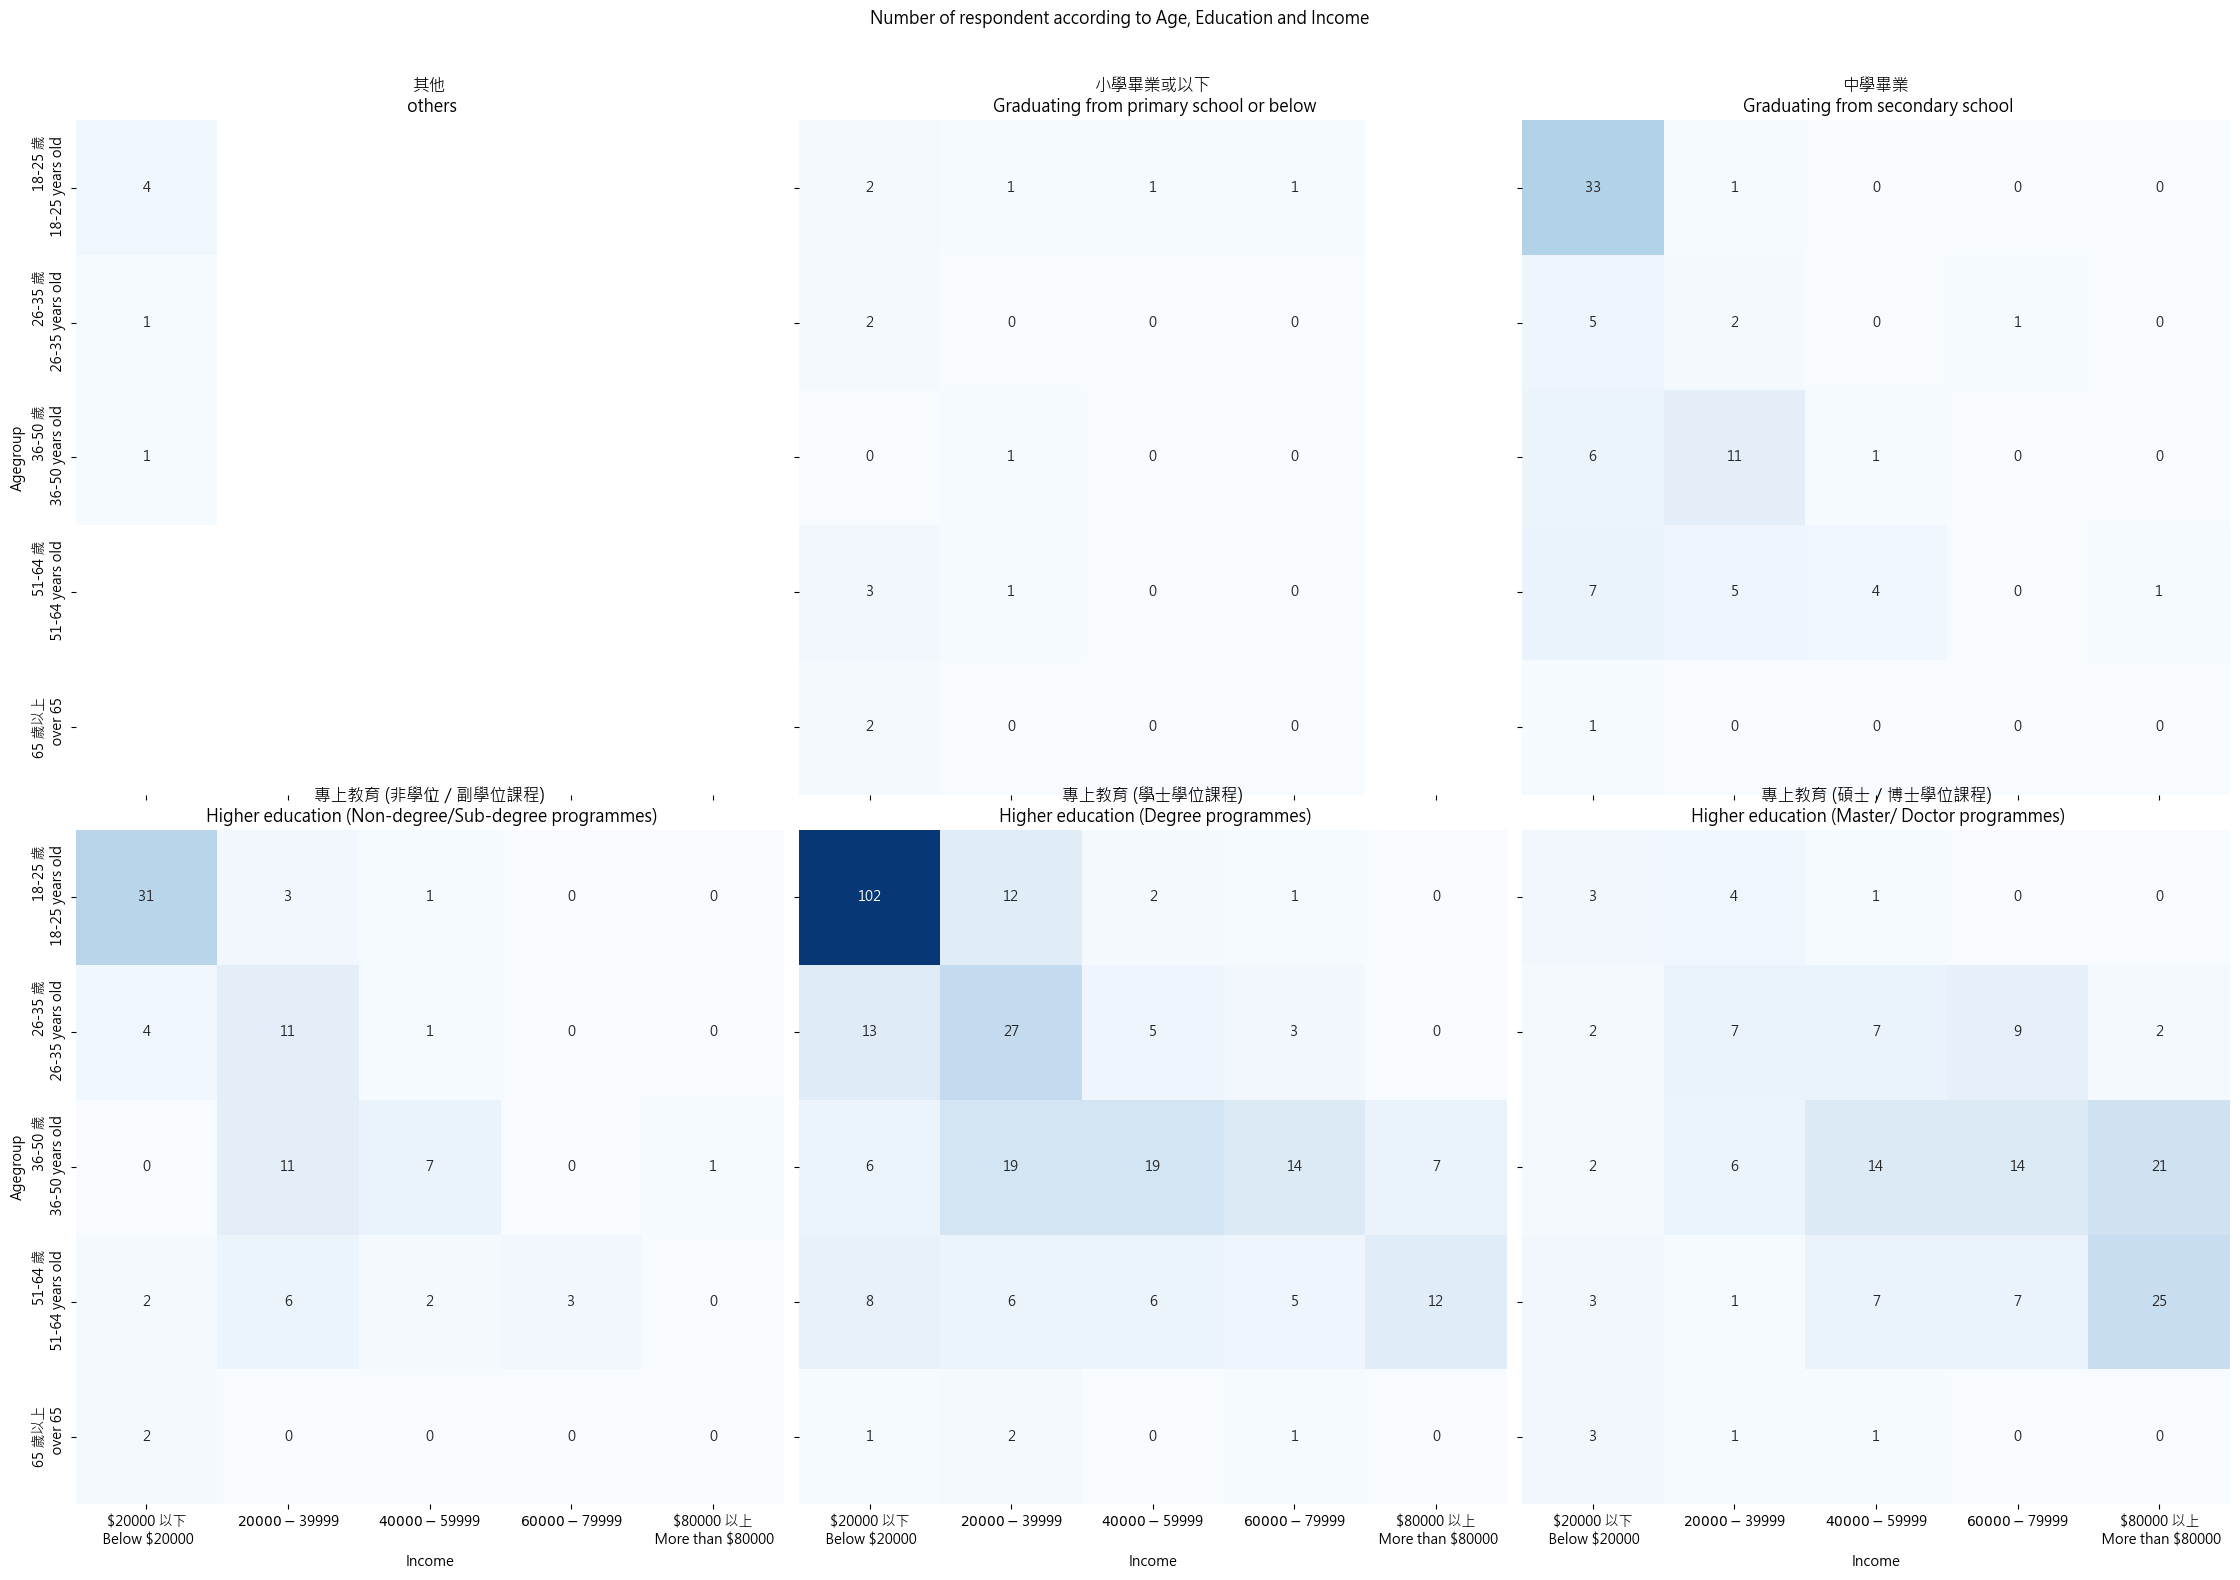

In [22]:
education_labels = [
    "其他\n others", 
    "小學畢業或以下\n Graduating from primary school or below", 
    "中學畢業\n Graduating from secondary school", 
    "專上教育 (非學位／副學位課程)\n Higher education (Non-degree/Sub-degree programmes)", 
    "專上教育 (學士學位課程)\n Higher education (Degree programmes)", 
    "專上教育 (碩士／博士學位課程)\n Higher education (Master/ Doctor programmes)"
]

Income_labels = [
    '$20000 以下\n Below $20000',
    '$20000 - $39999',
    '$40000 - $59999',
    '$60000 - $79999',
    '$80000 以上\n More than $80000'
]

Agegroup_labels = [
    '18-25 歳\n 18-25 years old',
    '26-35 歳\n 26-35 years old',
    '36-50 歳\n 36-50 years old',
    '51-64 歳\n 51-64 years old',
    '65 歳以上\n over 65'
]

# Create a cross-tabulation of age vs. income, faceted by education
g = sns.FacetGrid(df, col="Education", col_wrap=3, height=7.5)
g.map_dataframe(
    lambda data, **kwargs: sns.heatmap(
        pd.crosstab(data["Agegroup"], data["Income"]),
        annot=True, fmt="d", cmap="Blues", cbar=False,
        yticklabels=Agegroup_labels,
        xticklabels=Income_labels,
        vmin=0, vmax=105
        )
)

for ax, title in zip(g.axes.flat, education_labels):
    ax.set_title(title)
g.fig.suptitle("Number of respondent according to Age, Education and Income", y=1.05)
plt.show()